In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

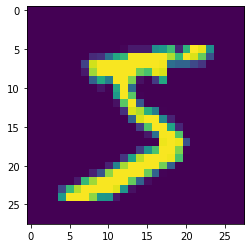

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

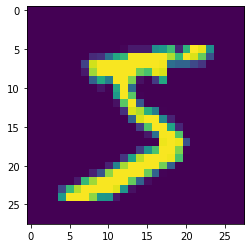

In [12]:
plt.imshow(X_train[0])

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


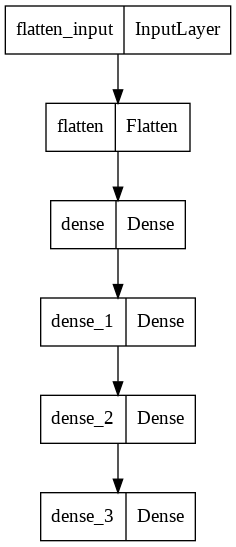

In [15]:
keras.utils.plot_model(model)

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2784 - accuracy: 0.9170 - val_loss: 0.1426 - val_accuracy: 0.9582
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1130 - accuracy: 0.9661 - val_loss: 0.1082 - val_accuracy: 0.9678
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0798 - accuracy: 0.9750 - val_loss: 0.0985 - val_accuracy: 0.9697
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0618 - accuracy: 0.9805 - val_loss: 0.0975 - val_accuracy: 0.9723
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9855 - val_loss: 0.0970 - val_accuracy: 0.9733
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0415 - accuracy: 0.9863 - val_loss: 0.1211 - val_accuracy: 0.9691
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0331 - accuracy: 0.9887 - val_loss: 0.1125 - val_ac

In [18]:
y_prob = model.predict(X_test)

In [19]:
y_pred = y_prob.argmax(axis=1)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9792

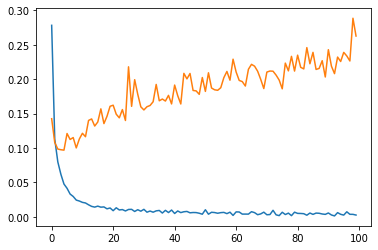

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

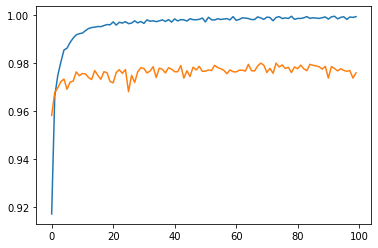

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

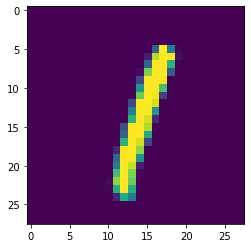

In [24]:
plt.imshow(X_test[5])

In [34]:
model.predict(X_test[5].reshape(1, 28, 28)).argmax(axis=1)

array([1])